In [1]:
# Imports
import os
import fitz  
import base64
from IPython.display import display, HTML
# from PIL import Image as PILImage
# from io import BytesIO

In [13]:
def print_figure(files_names,titles, widths):
    pdf_files = files_names
    # Convert first page of each PDF to an image and base64-encode it
    image_tags = []
    i = 0
    for pdf_file in pdf_files:
        doc = fitz.open(pdf_file)
        page = doc.load_page(0)  # first page
        pix = page.get_pixmap(dpi=100)
        img_bytes = pix.tobytes("png")
        img_b64 = base64.b64encode(img_bytes).decode("utf-8")
        
        # Create image tag with filename as tooltip
        # tag = f'<img src="data:image/png;base64,{img_b64}" width='+str(widths[i])+' style="margin:5px; display:inline-block;" title="{pdf_file}" />'
        tag = f"""
        <div style="display: inline-block; text-align: center; margin: 10px;">
            <img src="data:image/png;base64,{img_b64}" width="""+str(widths[i])+""" style="border:1px solid #ccc; border-radius: 4px;" />
            <div style="margin-top: 5px; font-size: 14px; font-weight: bold;">"""+titles[i]+"""</div>
        </div>
        """
        image_tags.append(tag)
        doc.close()
        i += 1

    # Display images side by side
    # html_code = "".join(image_tags)
    html_code = "<div style='white-space: nowrap; overflow-x: auto;'>" + "".join(image_tags) + "</div>"
    display(HTML(html_code))

___

### Model with constraint in $[0,T]$

\begin{equation}
    \left\lbrace \begin{array}{lllll}
    &\displaystyle\min_{u(\cdot)\in [0, u_{\max}]} \ \ J(u) 
    \\
    \\
    \text{s.t.}&\\
    &\dot{x}(t) = \big(M(s(t))-u(t)I_n+\varepsilon Z\big)x(t), \\
    \\
       & \dot{s}(t) = - \displaystyle\sum_{j=1}^n\frac{ \mu_j(s(t))x_j(t)}{Y_j}+ u(t)(s_{in}-s(t))
    \end{array}
    \right.
\end{equation}

* Model 1 :

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $ \displaystyle\frac{1}{T}\int_0^T S(x(t)) d t \ \leq \ \alpha$

* Model 2 :

  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $\displaystyle\frac{1}{T}\int_0^T P\big(x(t),u(t)\big) d t \ \geq \ \beta$

___

Monod kinetics of the type 

$
\mu_i (s) = \displaystyle\frac{i\ s}{i^2+s}
$

Data for the simulations: 

| $n$ | $u$ | $s_{in}$ | $Y_i$ | $x_i(0)$ | $s(0)$ |
| --- | --- | -------- | ----- | -------- | ------ |
|  5  | 1.5 |    35    |   1   |     5    |   10   |




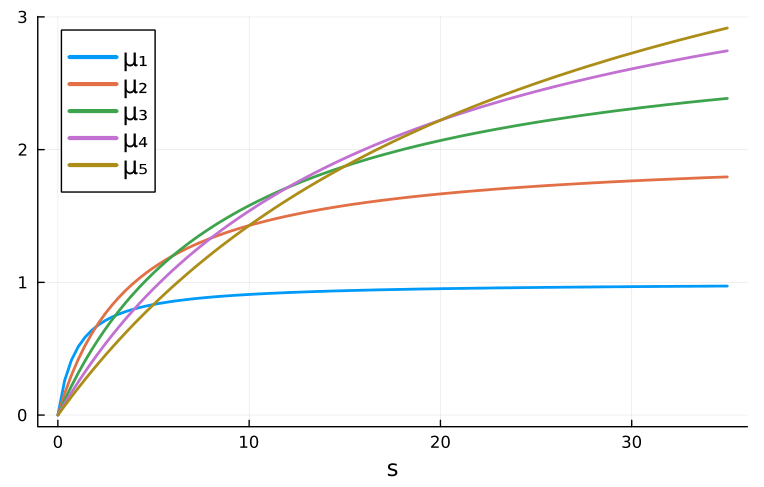

In [25]:
file_name = "output/kinetics_n=5.pdf"
print_figure([file_name], ["kinetics"], [500])

___

##### Solutions for Model 1

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $ \displaystyle\frac{1}{T}\int_0^T S(x(t)) d t \ \leq \ \alpha$

Solutions for
 
|$\alpha=0.25$|$\alpha=0.3$|
|--------|-------|
|$\alpha=0.4$ |$\alpha=0.5$|


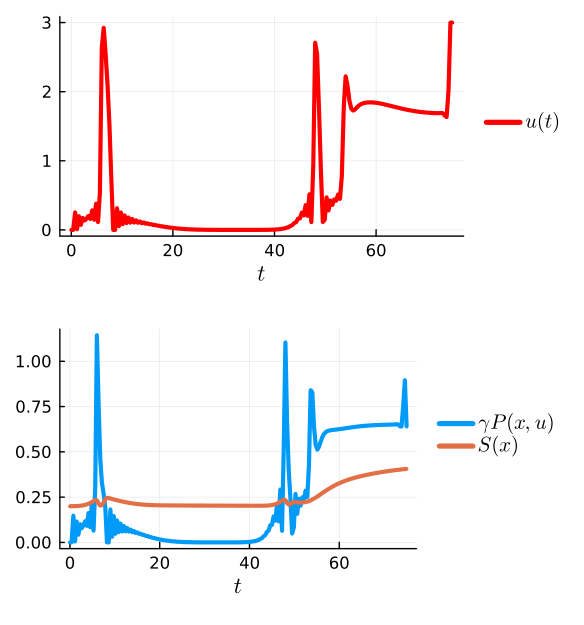
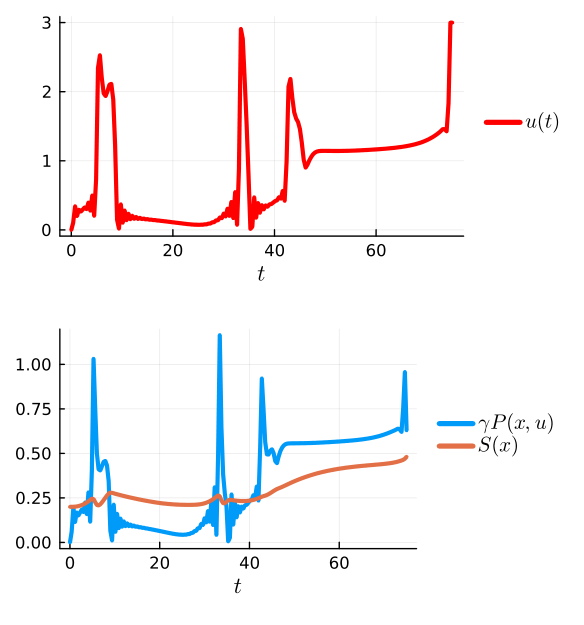


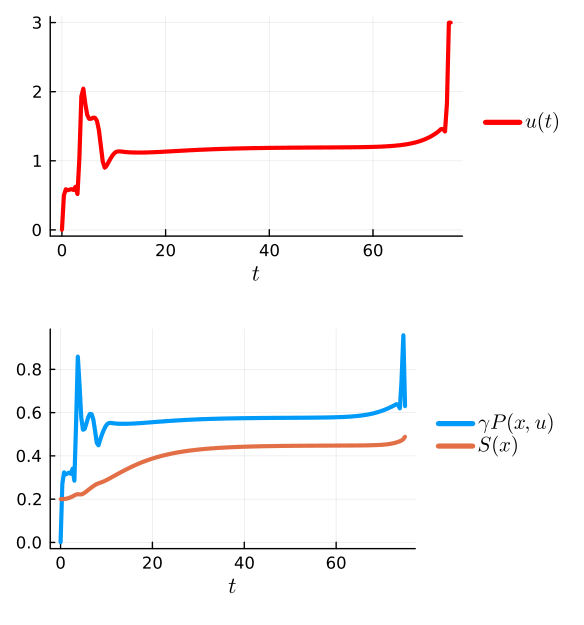
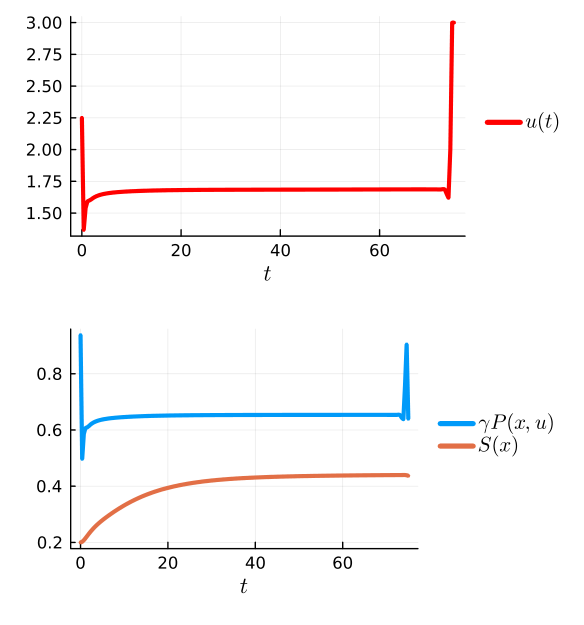

In [49]:
file_names= ["output/model 1/OCP1c=0-25.pdf","output/model 1/OCP1c=0-3.pdf"]
print_figure(file_names, ["α =0.25","α=0.3"], [400,400])
file_names= ["output/model 1/OCP1c=0-4.pdf","output/model 1/OCP1c=0-5.pdf"]
print_figure(file_names, ["α=0.4","α=0.5"], [400,400])

Comparison of the static and dynamic solution for several values of $c$



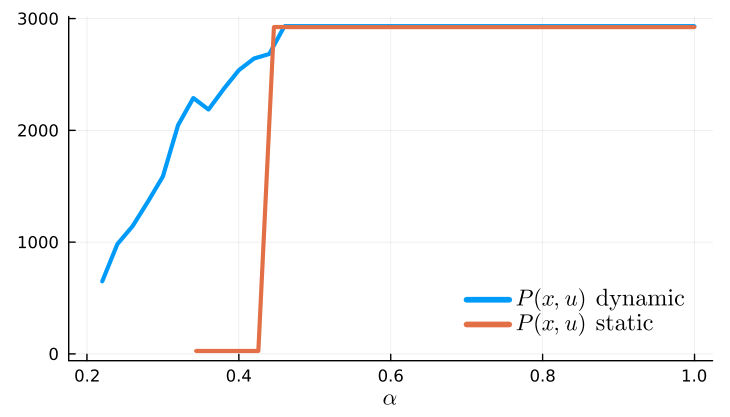

In [ ]:
file_name = "output/model 1/comp1.pdf"
print_figure([file_name], ["Static vs dynamic performance"], [500])

##### Solutions for Model 2
  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $\displaystyle\frac{1}{T}\int_0^T P\big(x(t),u(t)\big) d t \ \geq \ \beta$

Solutions for
 
|$\beta=0$|$\beta=7.5$|
|--------|-------|
|$\beta=22.5$ |$\beta=38.5$|


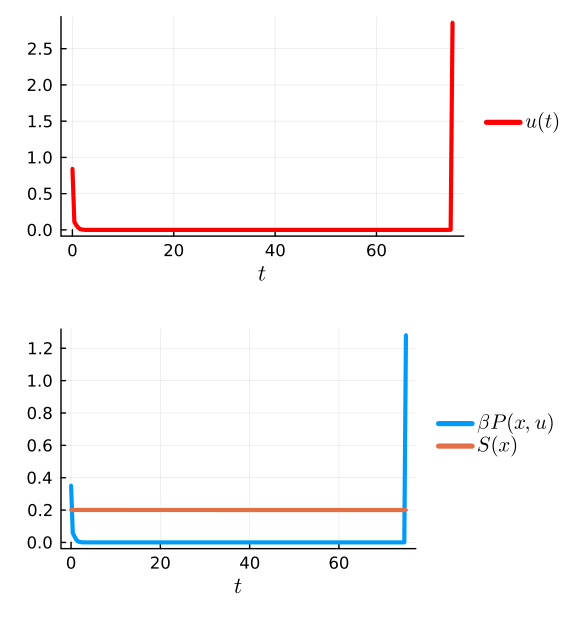
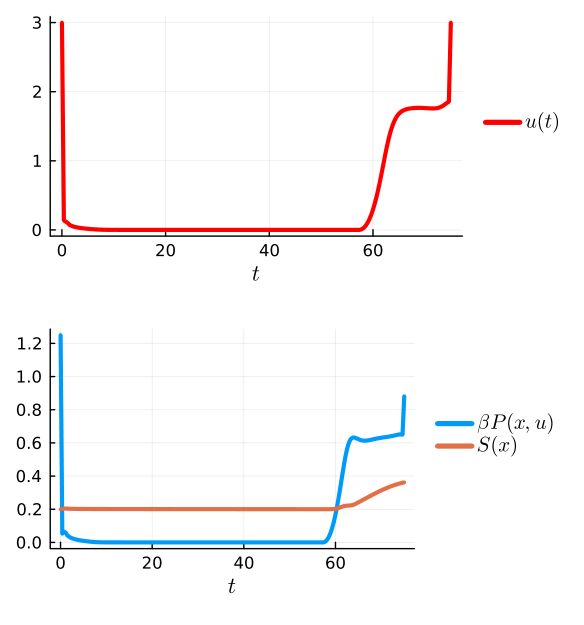


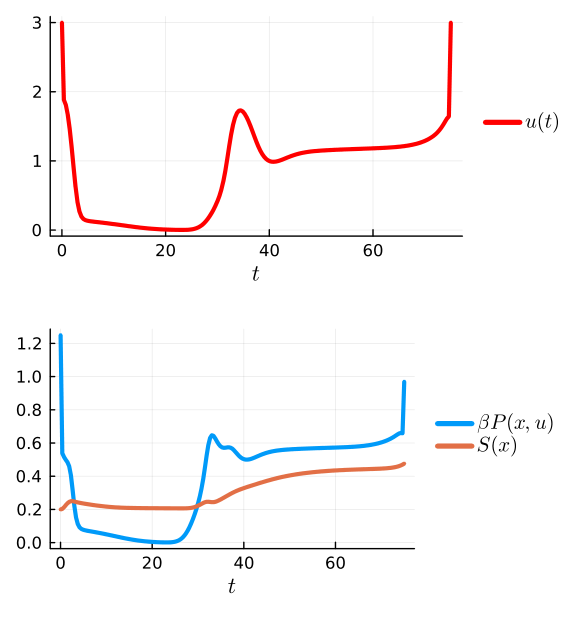
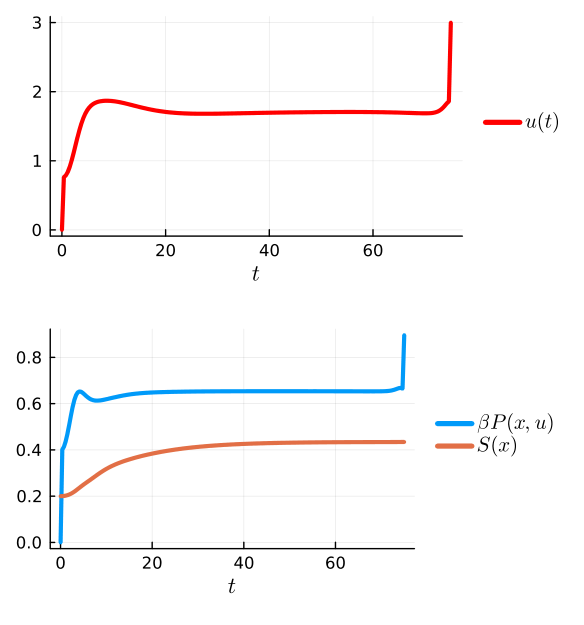

In [32]:
file_names= ["output/model 2/OCP1c=0.pdf","output/model 2/OCP1c=7-5.pdf"]
print_figure(file_names, ["β=0","β=7.5"], [400,400])
file_names= ["output/model 2/OCP1c=22-5.pdf","output/model 2/OCP1c=38-5.pdf"]
print_figure(file_names, ["β=22.5","β=38.5"], [400,400])

Comparison of the static and dynamic solution for several values of $c$



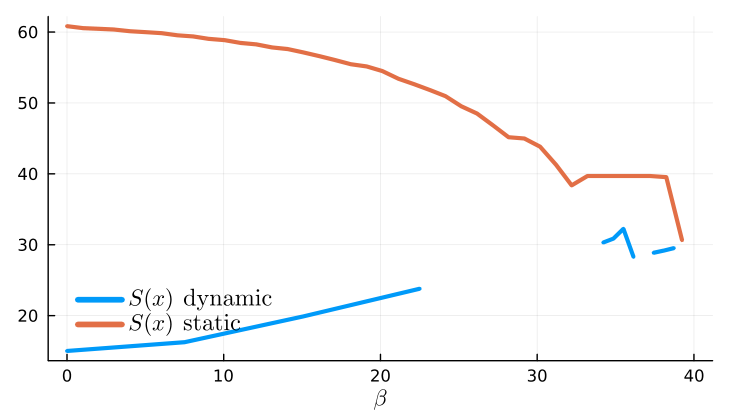

In [ ]:
file_name = "output/model 2/comp1.pdf"
print_figure([file_name], ["Static vs dynamic performance"], [500])

___

### Model with constraint for each  $t\in[0,T]$

\begin{equation}
    \left\lbrace \begin{array}{lllll}
    &\displaystyle\min_{u(\cdot)\in [0, u_{\max}]} \ \ J(u) 
    \\
    \\
    \text{s.t.}&\\
    &\dot{x}(t) = \big(M(s(t))-u(t)I_n+\varepsilon Z\big)x(t), \\
    \\
       & \dot{s}(t) = - \displaystyle\sum_{j=1}^n\frac{ \mu_j(s(t))x_j(t)}{Y_j}+ u(t)(s_{in}-s(t))
    \end{array}
    \right.
\end{equation}

* Model 1 :

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $  S(x(t)) \ \leq \ \alpha, \quad \forall t\geq 0$

* Model 2 :

  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $P\big(x(t),u(t)\big) \ \geq \ \beta, \quad \forall t\geq 0$

___

##### Solutions for Model 1

  *  $ J(u):=-\displaystyle\int_0^T P\big(x(t),u(t)\big) \; d t $

  * $  S(x(t)) \ \leq \ \alpha, \quad \forall t\geq 0$

Solutions for
 
|$\alpha=0.22$|$\alpha=0.36$|
|--------|-------|
|$\alpha=0.46$ |$\alpha=0.49$|


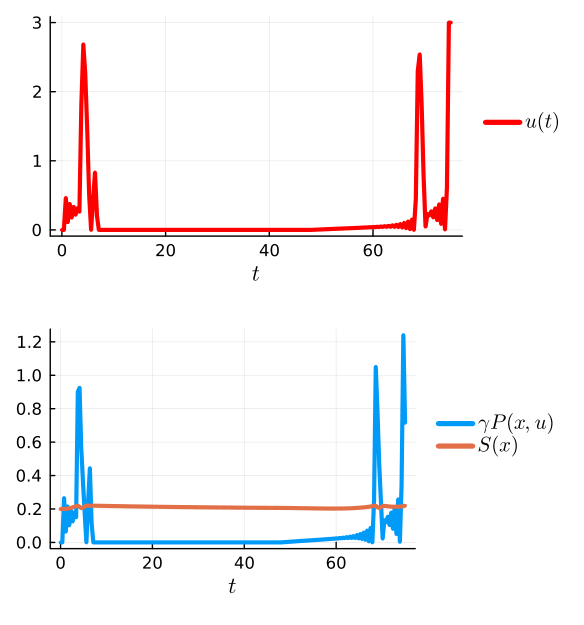
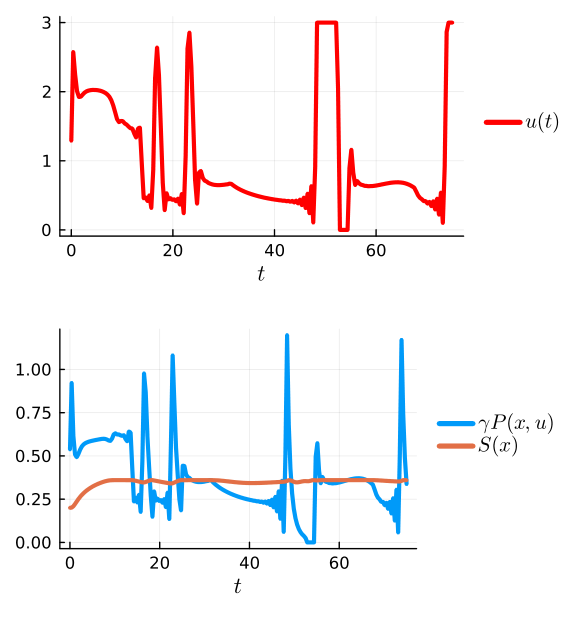


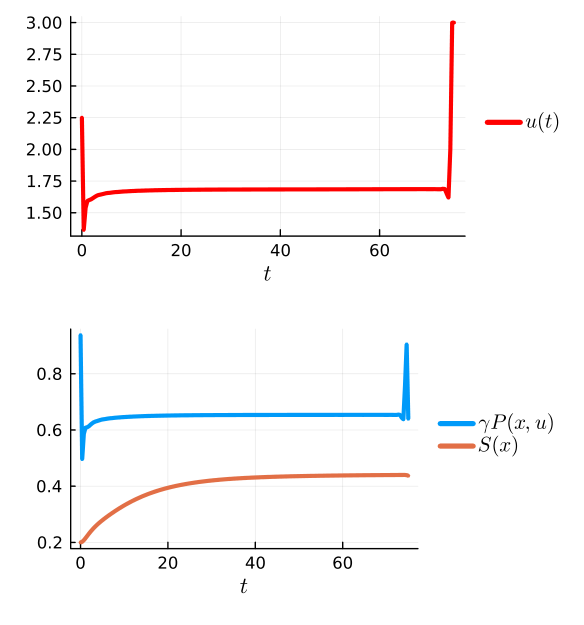
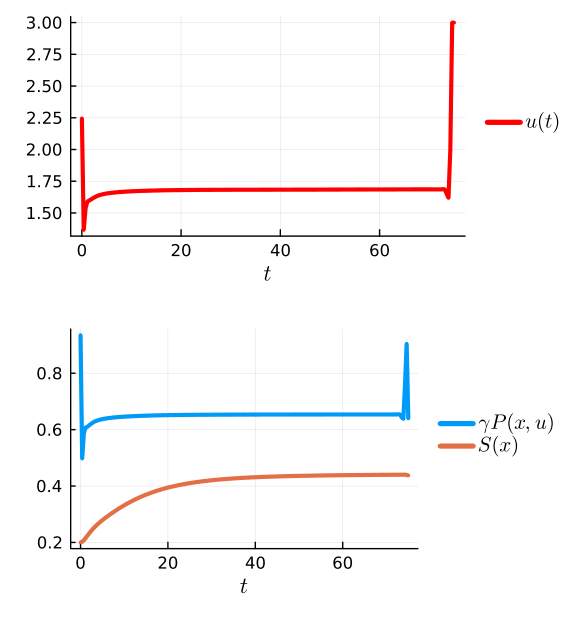

In [43]:
file_names= ["output/model 1/OCP2c=0-22.pdf","output/model 1/OCP2c=0-36.pdf"]
print_figure(file_names, ["α=0.22","α=0.36"], [400,400])
file_names= ["output/model 1/OCP2c=0-46.pdf","output/model 1/OCP2c=0-49.pdf"]
print_figure(file_names, ["α=0.46","α=0.49"], [400,400])

Comparison of the static and dynamic solution for several values of $c$



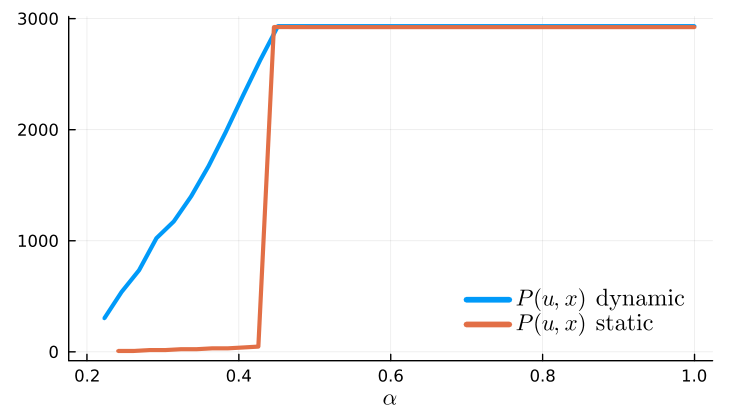

In [51]:
file_name = "output/model 1/comp2.pdf"
print_figure([file_name], ["Static vs dynamic performance"], [500])

##### Solutions for Model 2
  *  $ J(u):=\displaystyle\int_0^T S(x(t)) \; d t $

  * $P\big(x(t),u(t)\big)\ \geq \ \beta, \quad \forall t\geq 0$

Solutions for
 
|$\beta=0$|$\beta=31$|
|--------|-------|
|$\beta=35.5$ |$\beta=36.7$|


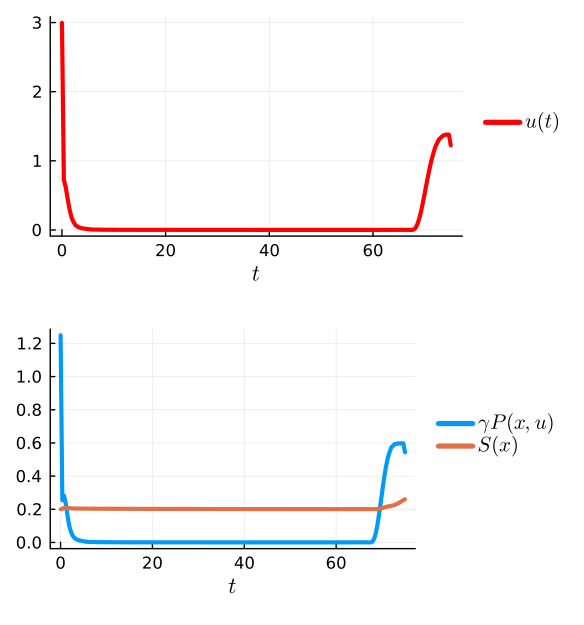
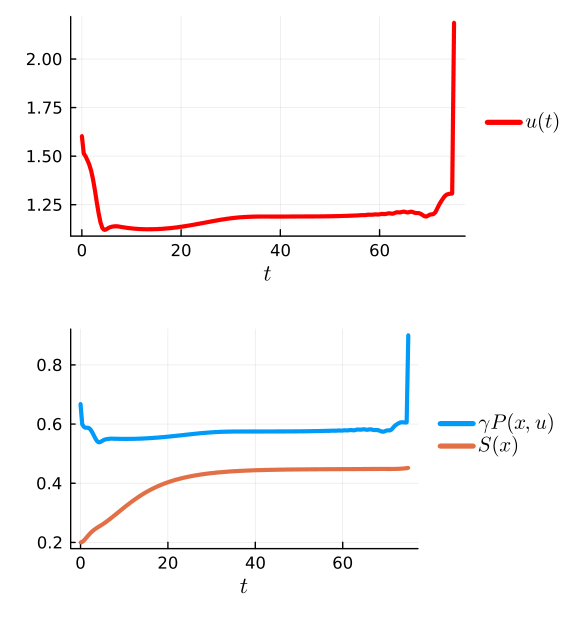


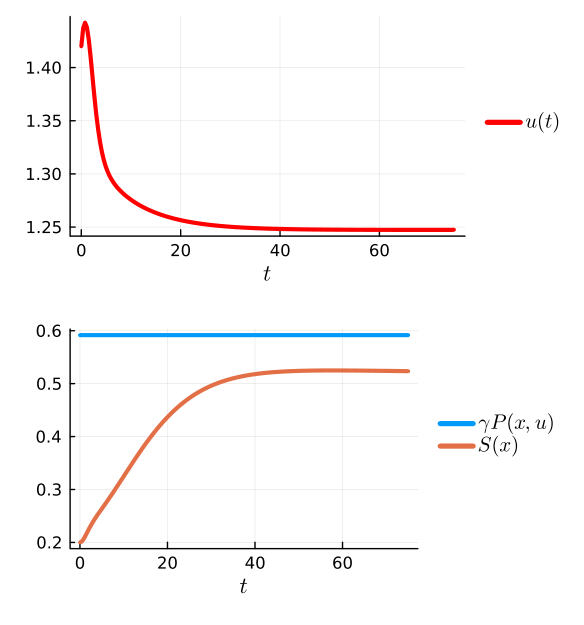
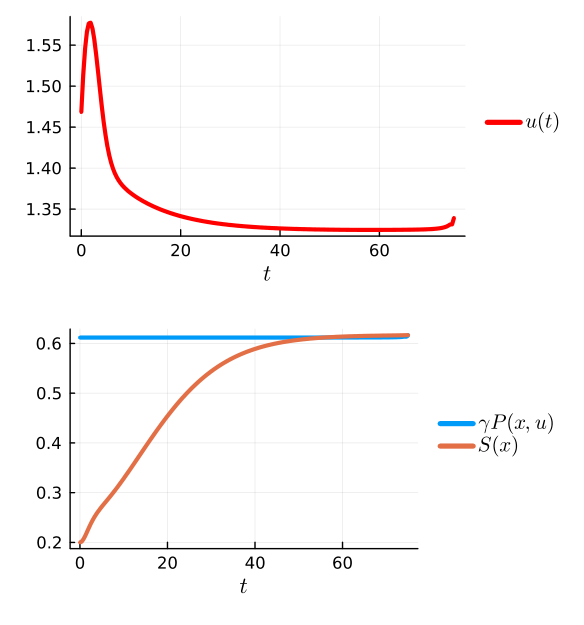

In [38]:
file_names= ["output/model 2/OCP2c=0.pdf","output/model 2/OCP2c=31.pdf"]
print_figure(file_names, ["β=0","β=31"], [400,400])
file_names= ["output/model 2/OCP2c=35-5.pdf","output/model 2/OCP2c=36-7.pdf"]
print_figure(file_names, ["β=35.5","β=36.7"], [400,400])

Comparison of the static and dynamic solution for several values of $c$



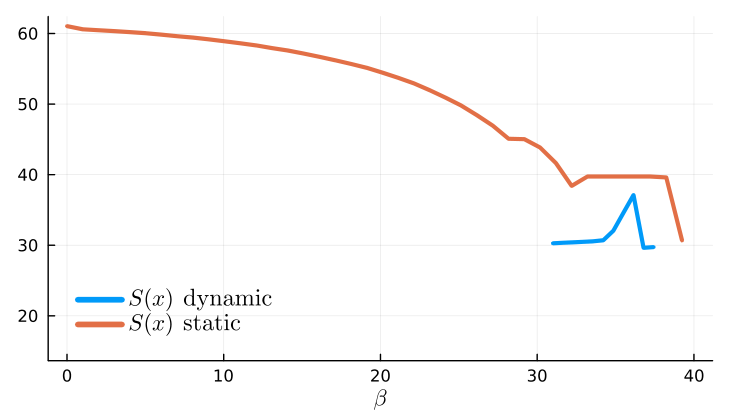

In [50]:
file_name = "output/model 2/comp2.pdf"
print_figure([file_name], ["Static vs dynamic performance"], [500])